# Задача 1: Аналіз функції Растригіна

## Умова задачі

Розглянемо двовимірну функцію Растригіна:

$$f(x, y) = 20 + x^2 + y^2 - 10[\cos(2\pi x) + \cos(2\pi y)]$$

### Завдання:
1. Знайти градієнт функції
2. Визначити критичні точки
3. Класифікувати їх як локальні/глобальні мінімуми
4. Оцінити кількість локальних мінімумів в області $[-2; 2]^2$

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize, fmin_bfgs
from scipy.signal import argrelmin

## 1. Визначення функції Растригіна та її градієнта

In [27]:
def rastrigin(x, y):
    """Функція Растригіна"""
    return 20 + x**2 + y**2 - 10 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y))

def rastrigin_vector(X):
    """Функція Растригіна для вектора [x, y]"""
    return rastrigin(X[0], X[1])

def gradient_rastrigin(x, y):
    """Градієнт функції Растригіна
    
    df/dx = 2x + 20π*sin(2πx)
    df/dy = 2y + 20π*sin(2πy)
    """
    df_dx = 2*x + 20*np.pi*np.sin(2*np.pi*x)
    df_dy = 2*y + 20*np.pi*np.sin(2*np.pi*y)
    return np.array([df_dx, df_dy])

def gradient_rastrigin_vector(X):
    """Градієнт функції Растригіна для вектора [x, y]"""
    return gradient_rastrigin(X[0], X[1])

print("Градієнт функції Растригіна:")
print("∇f(x, y) = [df/dx, df/dy]")
print("df/dx = 2x + 20π·sin(2πx)")
print("df/dy = 2y + 20π·sin(2πy)")

Градієнт функції Растригіна:
∇f(x, y) = [df/dx, df/dy]
df/dx = 2x + 20π·sin(2πx)
df/dy = 2y + 20π·sin(2πy)


## 2. Візуалізація функції Растригіна

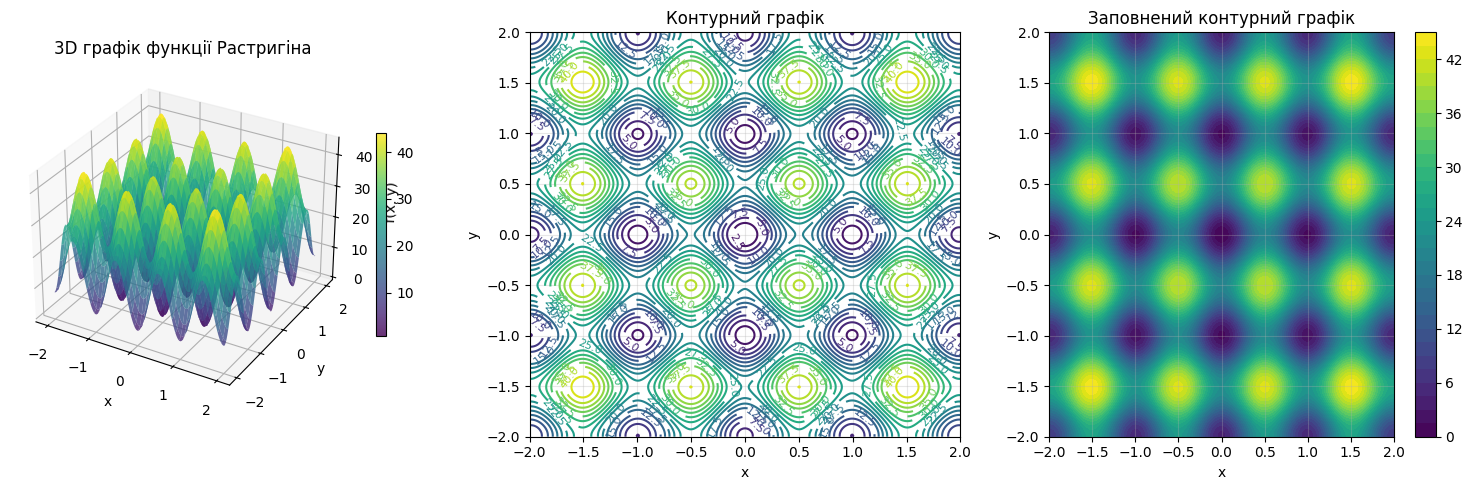

Глобальний мінімум знаходиться в точці (0, 0) з значенням f(0, 0) = 0.0


In [28]:
# Створюємо сітку для візуалізації
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

# 3D графік
fig = plt.figure(figsize=(15, 5))

# 3D поверхня
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('3D графік функції Растригіна')
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Контурний графік
ax2 = fig.add_subplot(132)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Контурний графік')
ax2.grid(True, alpha=0.3)

# Заповнений контурний графік
ax3 = fig.add_subplot(133)
contourf = ax3.contourf(X, Y, Z, levels=30, cmap='viridis')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Заповнений контурний графік')
fig.colorbar(contourf, ax=ax3)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Глобальний мінімум знаходиться в точці (0, 0) з значенням f(0, 0) = {rastrigin(0, 0)}")

## 3. Пошук критичних точок (локальних мінімумів)

In [29]:
# Пошук локальних мінімумів з різних початкових точок
local_minima = []

# Створюємо сітку початкових точок
initial_points = []
for x0 in np.linspace(-2, 2, 9):
    for y0 in np.linspace(-2, 2, 9):
        initial_points.append([x0, y0])

print(f"Виконуємо оптимізацію з {len(initial_points)} початкових точок...\n")

# Виконуємо оптимізацію з кожної початкової точки
for i, x0 in enumerate(initial_points):
    result = minimize(rastrigin_vector, x0, method='BFGS', jac=gradient_rastrigin_vector)
    
    if result.success:
        # Перевіряємо, чи ця точка вже знайдена
        is_new = True
        for existing_min in local_minima:
            if np.allclose(result.x, existing_min['x'], atol=0.1):
                is_new = False
                break
        
        if is_new and -2 <= result.x[0] <= 2 and -2 <= result.x[1] <= 2:
            local_minima.append({
                'x': result.x,
                'f': result.fun,
                'grad': gradient_rastrigin_vector(result.x)
            })

# Сортуємо мінімуми за значенням функції
local_minima.sort(key=lambda m: m['f'])

print(f"\nЗнайдено {len(local_minima)} унікальних локальних мінімумів:\n")
print(f"{'№':<3} {'x':<8} {'y':<8} {'f(x,y)':<12} {'||∇f||':<12} {'Тип'}")
print("-" * 60)

for i, minimum in enumerate(local_minima, 1):
    x, y = minimum['x']
    f_val = minimum['f']
    grad_norm = np.linalg.norm(minimum['grad'])
    
    # Визначаємо тип мінімуму
    if np.allclose([x, y], [0, 0], atol=0.1):
        min_type = "Глобальний"
    else:
        min_type = "Локальний"
    
    print(f"{i:<3} {x:<8.4f} {y:<8.4f} {f_val:<12.6f} {grad_norm:<12.6e} {min_type}")

Виконуємо оптимізацію з 81 початкових точок...


Знайдено 21 унікальних локальних мінімумів:

№   x        y        f(x,y)       ||∇f||       Тип
------------------------------------------------------------
1   -0.0000  -0.0000  0.000000     3.673824e-08 Глобальний
2   -0.9950  0.0000   0.994959     2.415845e-08 Локальний
3   0.0000   -0.9950  0.994959     2.415845e-08 Локальний
4   0.0000   0.9950   0.994959     2.415845e-08 Локальний
5   0.9950   0.0000   0.994959     2.415845e-08 Локальний
6   -0.9950  -0.9950  1.989918     1.807622e-06 Локальний
7   -0.9950  0.9950   1.989918     1.807622e-06 Локальний
8   0.9950   0.9950   1.989918     4.038146e-08 Локальний
9   0.9950   -0.9950  1.989918     9.781849e-06 Локальний
10  -1.9899  -0.9950  4.974790     3.603127e-08 Локальний
11  -1.9899  0.9950   4.974790     3.603127e-08 Локальний
12  -0.9950  -1.9899  4.974790     3.603127e-08 Локальний
13  -0.9950  1.9899   4.974790     3.603127e-08 Локальний
14  0.9950   -1.9899  4.974790     3.6

## 4. Візуалізація знайдених мінімумів

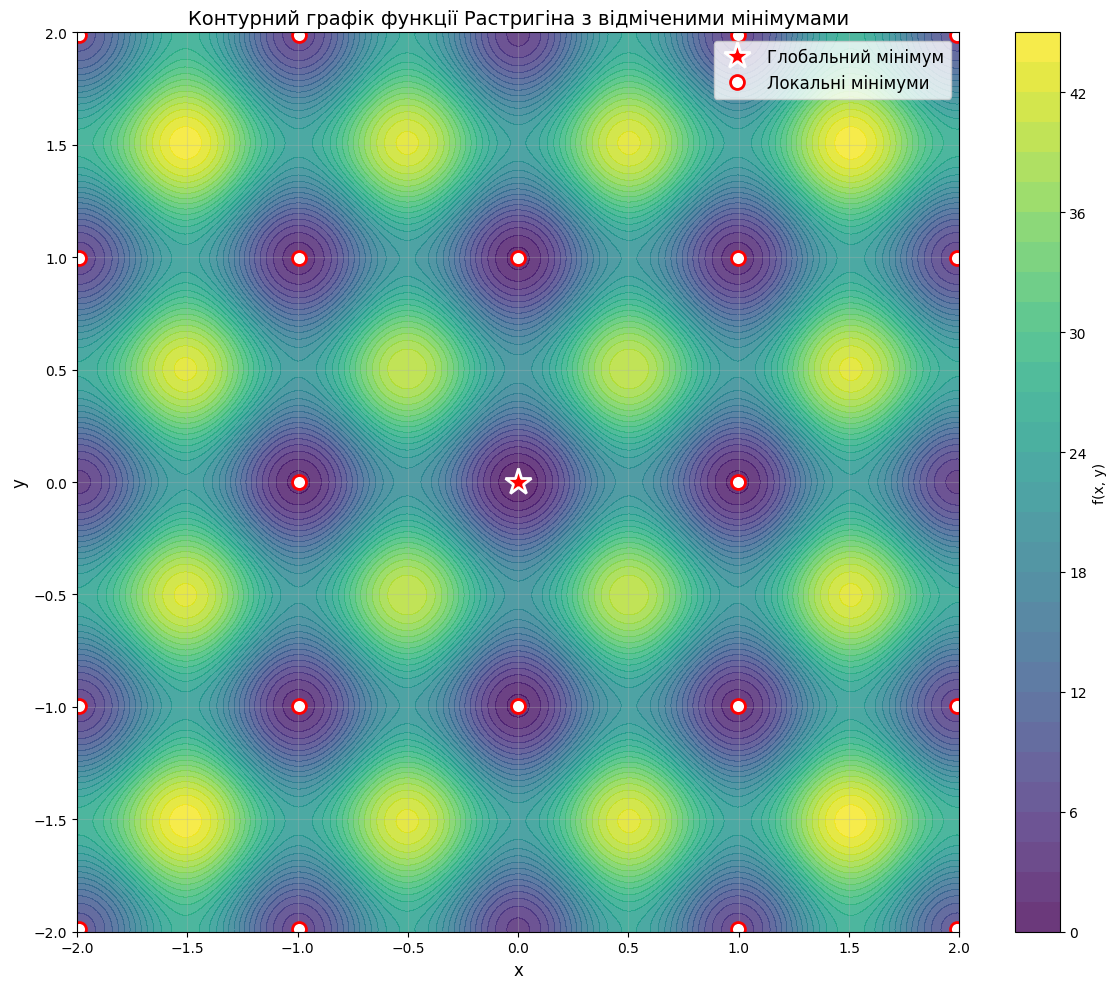

In [30]:
# Візуалізація локальних мінімумів на контурному графіку
plt.figure(figsize=(12, 10))

# Контурний графік
contour = plt.contourf(X, Y, Z, levels=30, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='f(x, y)')

# Відмічаємо локальні мінімуми
for i, minimum in enumerate(local_minima):
    x, y = minimum['x']
    if np.allclose([x, y], [0, 0], atol=0.1):
        # Глобальний мінімум - червонийs
        plt.plot(x, y, 'r*', markersize=20, markeredgecolor='white', 
                markeredgewidth=2, label='Глобальний мінімум' if i == 0 else '')
    else:
        # Локальні мінімуми - білі
        plt.plot(x, y, 'wo', markersize=10, markeredgecolor='red', 
                markeredgewidth=2, label='Локальні мінімуми' if i == 1 else '')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Контурний графік функції Растригіна з відміченими мінімумами', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.tight_layout()
plt.show()

## Висновки

### Теоретичні підсумки
- Розглянута функція Растригіна у 2D:  
  f(x, y) = 20 + x² + y² − 10[cos(2πx) + cos(2πy)].
- Аналітичний градієнт:  
  ∇f(x, y) = [2x + 20π·sin(2πx), 2y + 20π·sin(2πy)].  
  Наявність синусів робить ландшафт періодичним і «ребристим», що зумовлює велику кількість локальних мінімумів.
- Глобальний мінімум: у точці (0, 0) зі значенням f(0, 0) = 0.  
  У її околі гессіан є додатно визначеним, тому методи локальної оптимізації мають швидку збіжність.

### Емпіричні спостереження
- Візуалізації (3D, контури) показують густу осциляційну структуру: вузькі «коридори» між гребенями ускладнюють пошук глобального мінімуму з довільного старту.         
- Багатостартовий локальний пошук (BFGS з різних початкових точок на сітці [-2, 2]²) знаходить набір унікальних локальних мінімумів.  
  Найменше значення послідовно відповідає околу (0, 0), що узгоджується з теорією.
- Кластеризація знайдених рішень (поріг близькості) показує, що частина стартів збігається до однакових мінімумів -- це ілюструє «басейни притягання». Чим ближче старт до (0, 0), тим вища імовірність збіжності саме до глобального мінімуму.

### Практичні висновки для оптимізації
- Локальні методи з градієнтами (як-от BFGS) ефективні поблизу мінімуму, але не гарантують глобальність з довільного старту в такому «ребристому» ландшафті.
- Оцінка кількості локальних мінімумів у [-2, 2]² залежить від роздільної здатності пошуку; з підвищенням густини стартів виявлятиметься щораз більше мінімумів, розташованих періодично по «решітці».і